In [2]:
import pandas as pd
import numpy as np
import hashlib
from sklearn.preprocessing import Normalizer, StandardScaler, LabelEncoder
from tabulate import tabulate

In [3]:
df_origin = pd.read_csv('train.csv')
df_kaggle_origin = pd.read_csv('test.csv')
df_sub = pd.read_csv('sample_submission.csv')

# EDA

In [4]:
pd.set_option('display.max_columns', None)
print(df_origin.shape)
print(tabulate(df_origin, headers='keys', tablefmt='plain'))

(8693, 14)
        PassengerId  HomePlanet      CryoSleep  Cabin     Destination      Age    VIP    RoomService    FoodCourt    ShoppingMall    Spa    VRDeck  Name                Transported
   0        0001_01  Europa                  0  B/0/P     TRAPPIST-1e       39      0              0            0               0      0         0  Maham Ofracculy     False
   1        0002_01  Earth                   0  F/0/S     TRAPPIST-1e       24      0            109            9              25    549        44  Juanna Vines        True
   2        0003_01  Europa                  0  A/0/S     TRAPPIST-1e       58      1             43         3576               0   6715        49  Altark Susent       False
   3        0003_02  Europa                  0  A/0/S     TRAPPIST-1e       33      0              0         1283             371   3329       193  Solam Susent        False
   4        0004_01  Earth                   0  F/1/S     TRAPPIST-1e       16      0            303           70 

In [5]:
print(df_kaggle_origin.shape)
print(tabulate(df_kaggle_origin, headers='keys', tablefmt='plain'))

(4277, 13)
        PassengerId  HomePlanet      CryoSleep  Cabin     Destination      Age    VIP    RoomService    FoodCourt    ShoppingMall    Spa    VRDeck  Name
   0        0013_01  Earth                   1  G/3/S     TRAPPIST-1e       27      0              0            0               0      0         0  Nelly Carsoning
   1        0018_01  Earth                   0  F/4/S     TRAPPIST-1e       19      0              0            9               0   2823         0  Lerome Peckers
   2        0019_01  Europa                  1  C/0/S     55 Cancri e       31      0              0            0               0      0         0  Sabih Unhearfus
   3        0021_01  Europa                  0  C/1/S     TRAPPIST-1e       38      0              0         6652               0    181       585  Meratz Caltilter
   4        0023_01  Earth                   0  F/5/S     TRAPPIST-1e       20      0             10            0             635      0         0  Brence Harperez
   5        0027

In [6]:
print(df_sub.shape)
df_sub.head()

(4277, 2)


,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [7]:
df_origin.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [8]:
df_origin.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [14]:
def summarize(DataFrame):
    summary = pd.DataFrame()
    numeric_cols = DataFrame.select_dtypes(include=[np.number]).columns
    # Data Type
    summary['Data Type'] = DataFrame.dtypes
    # The Number of Missing Values
    summary['# of NAs'] = DataFrame.isna().sum()
    # The Percentage of Missing Values
    summary['% of NAs'] = round((DataFrame.isna().sum() / DataFrame.shape[0]) * 100, 2)
    # The Number of Unique Values
    summary['# of Unique'] = DataFrame.apply(lambda x: x.nunique())
    # Max
    summary['Max'] = DataFrame.apply(lambda x: x.max() if pd.api.types.is_numeric_dtype(x) else '-')
    # Min
    summary['Min'] = DataFrame.apply(lambda x: x.min() if pd.api.types.is_numeric_dtype(x) else '-')
    
    # Measures of Central Tendency: Mean, Median, Mode 
    summary['Mean'] = DataFrame.apply(lambda x: round(x.mean(), 2) if pd.api.types.is_numeric_dtype(x) else '-')
    summary['Median'] = DataFrame.apply(lambda x: x.median() if pd.api.types.is_numeric_dtype(x) else '-')
    summary['Mode'] = DataFrame.apply(lambda x: x.mode().iloc[0] if not x.mode().empty else '-')
    
    # Measures of Dispersion: Range, Variance, Standard Deviation
    summary['Range'] = DataFrame[numeric_cols].apply(lambda x: x.max() - x.min() if pd.api.types.is_numeric_dtype(x) else '-')
    summary['Variance'] = DataFrame.apply(lambda x: x.var() if pd.api.types.is_numeric_dtype(x) else '-')
    summary['Standard Deviation'] = DataFrame.apply(lambda x: x.std() if pd.api.types.is_numeric_dtype(x) else '-')
    
    # Measures of Shape: Skewness, Kurtosis
    summary['Skewness'] = DataFrame.apply(lambda x: round(x.skew(), 2) if pd.api.types.is_numeric_dtype(x) else '-')
    summary['Kurtosis'] = DataFrame.apply(lambda x: round(x.kurt(), 2) if pd.api.types.is_numeric_dtype(x) else '-')
    
    return summary


summary = summarize(df_origin)
summary

,Data Type,# of NAs,% of NAs,# of Unique,Max,Min,Mean,Median,Mode,Range,Variance,Standard Deviation,Skewness,Kurtosis
PassengerId,object,0,0.00,8693,-,-,-,-,0001_01,NaN,-,-,-,-
HomePlanet,object,201,2.31,3,-,-,-,-,Earth,NaN,-,-,-,-
CryoSleep,object,217,2.50,2,-,-,-,-,False,NaN,-,-,-,-
Cabin,object,199,2.29,6560,-,-,-,-,G/734/S,NaN,-,-,-,-
Destination,object,182,2.09,3,-,-,-,-,TRAPPIST-1e,NaN,-,-,-,-
Age,float64,179,2.06,80,79.0,0.0,28.83,27.0,24.0,79.0,209.931742,14.489021,0.42,0.1
VIP,object,203,2.34,2,-,-,-,-,False,NaN,-,-,-,-
RoomService,float64,181,2.08,1273,14327.0,0.0,224.69,0.0,0.0,14327.0,444512.44206,666.717663,6.33,65.27
FoodCourt,float64,183,2.11,1507,29813.0,0.0,458.08,0.0,0.0,29813.0,2596897.57178,1611.48924,7.1,73.31
ShoppingMall,float64,208,2.39,1115,23492.0,0.0,173.73,0.0,0.0,23492.0,365657.806887,604.696458,12.63,328.87


# Preprocessing

In [372]:
df_origin.groupby('Destination').size().reset_index(name='Count')

,Destination,Count
0,55 Cancri e,1800
1,PSO J318.5-22,796
2,TRAPPIST-1e,5915


In [373]:
y = df_origin.pop('Transported')

new_submission = df_kaggle_origin[["PassengerId"]]
new_submission.head()

,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01


In [374]:
def shrink(df, features):
  for f in features:
    df.drop(columns=[f], inplace=True)
  return (df)

In [375]:
def standardize(df):
  scaler = StandardScaler()
  numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
  df[numerical_features] = scaler.fit_transform(df[numerical_features])
  print(f'Standardized shape: {df.shape}')
  return (df)

In [376]:
def outlierize(df):
  numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
  for feature in numerical_features:
      q1 = df[feature].quantile(0.25)
      q3 = df[feature].quantile(0.75)
      iqr = q3 - q1
      lower_bound = q1 - 1.5 * iqr
      upper_bound = q3 + 1.5 * iqr
      #df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
  print(f'Outlierized shape: {df.shape}')
  return(df)

In [377]:
def prepare_cabin(df, feature_name):
  mv = df[feature_name].isna().sum()
  print(f'The number of missing values in {feature_name} before cleaning: ', mv)
  df_grouped = df.groupby(['PassengerGroup', feature_name]).size().reset_index(name='Count')
  df_grouped = df[df[feature_name].notnull()]
  df_grouped = df.groupby(['PassengerGroup', feature_name]).size().reset_index(name='Count')
  df_grouped_max = df_grouped.groupby(['PassengerGroup', feature_name])['Count'].max().reset_index()
  df_grouped_max.drop(columns=['Count'], inplace=True)
  df_grouped_max = df_grouped.groupby(['PassengerGroup'])[feature_name].min().reset_index()
  df_grouped_max = df_grouped_max.rename(columns={feature_name: feature_name+'_for_Upd'})
  #spojení dvou datasetů
  df_merged = pd.merge(df, df_grouped_max,how='left', on='PassengerGroup')

  countofupdates = 0
  for index, row in df_merged.iterrows():
      if pd.isnull(row[feature_name]) and not pd.isnull(row[feature_name+'_for_Upd']):
          df_merged.at[index, feature_name] = row[feature_name+'_for_Upd']
          countofupdates += 1
  df_merged = df_merged.drop(columns=[feature_name+'_for_Upd'])
  mv = df_merged[feature_name].isna().sum()
  print(f'The number of missing values in {feature_name} after cleaning: ', mv)
  return(df_merged)

In [378]:
def fill_missing_by_group(df, column, group_col):
  mv = df[column].isna().sum()
  print(f'The number of missing values in {column} before cleaning by group: ', mv)
  df[column] = df.groupby(group_col)[column].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)).infer_objects(copy=False)
  mv = df[column].isna().sum()
  print(f'The number of missing values in {column} after cleaning by group: ', mv)
  return df


In [379]:
def fill_missing_by_lastname(df, column, lastname_col):
  mv = df[column].isna().sum()
  print(f'The number of missing values in {column} before cleaning by lastname: ', mv)
  ln_gb = df.groupby(lastname_col)[column].agg(pd.Series.mode)
  ln_index = df[df[column].isna() & df[lastname_col].notna() & df[lastname_col].isin(ln_gb.index)].index

  def fill_mode(last_name):
      mode_value = ln_gb[last_name]
      if isinstance(mode_value, np.ndarray):
          return mode_value[0] if mode_value.size > 0 else np.nan
      return mode_value

  df.loc[ln_index, column] = df.loc[ln_index, lastname_col].map(fill_mode)
  mv = df[column].isna().sum()
  print(f'The number of missing values in {column} after cleaning by lastname: ', mv)
  return df

In [380]:
def preproces_data_base_version(df, stand_param, outlier_param, shrink_param, shrink_list):
  #Cabin Split
  df[['Cabin_Deck', 'Cabin_Num', 'Cabin_Side']] = df['Cabin'].str.split('/', expand=True)
  df.drop(columns=['Cabin'], inplace=True)
  #Destination
  df['PSO_Dest'] = df['Destination'].map(lambda x: 1 if x == "PSO J318.5-22" else 0).astype(int)
  df['Cancri_Dest'] = df['Destination'].map(lambda x: 1 if x == "55 Cancri e" else 0).astype(int)
  #df['TRAPPIST_Dest'] = df['Destination'].map(lambda x: 1 if x == "TRAPPIST-1e" else 0).astype(int)
  df.drop(columns=['Destination'], inplace=True)
  #HomePlanet
  df['Europa'] = df['HomePlanet'].map(lambda x: 1 if x == "Europa" else 0).astype(int)
  df['Earth'] = df['HomePlanet'].map(lambda x: 1 if x == "Earth" else 0).astype(int)
  #df['Mars'] = df['HomePlanet'].map(lambda x: 1 if x == "Mars" else 0).astype(int)
  df.drop(columns=['HomePlanet'], inplace=True)
  #Name
  df.drop(columns=['Name'], inplace=True)
  #Passenger Split
  df[['PassengerGroup', 'PassengerNumInGroup']] = df['PassengerId'].str.split('_', expand=True)

  #Cabin calculation & Update
  df_merged = prepare_cabin(df, 'Cabin_Num')
  df_merged = prepare_cabin(df, 'Cabin_Deck')
  df_merged = prepare_cabin(df, 'Cabin_Side')

  #Missing Value Handling
  df_merged['Age'].fillna(round(df_merged['Age'].mean(), 0), inplace=True)
  df_merged['RoomService'].fillna(df_merged['RoomService'].mean(), inplace=True)
  df_merged['FoodCourt'].fillna(df_merged['FoodCourt'].mean(), inplace=True)
  df_merged['ShoppingMall'].fillna(df_merged['ShoppingMall'].mean(), inplace=True)
  df_merged['Spa'].fillna(df_merged['Spa'].mean(), inplace=True)
  df_merged['VRDeck'].fillna(df_merged['VRDeck'].mean(),inplace=True)
  df_merged['FoodCourt'].fillna(0, inplace=True)
  df_merged['Total_Spent'] = df_merged['VRDeck']+df_merged['Spa']+df_merged['ShoppingMall']+df_merged['FoodCourt']+df_merged['RoomService']
  df_merged['VIP'] = df_merged['VIP'].fillna(False)
  df_merged['CryoSleep'] = df_merged['CryoSleep'].fillna(False)
  df_merged['Cabin_Num'] = df_merged['Cabin_Num'].fillna(-1)
  df_merged['Cabin_Num'] = df_merged['Cabin_Num'].astype('int')
  df_merged['Cabin_Side'] = df_merged['Cabin_Side'].fillna('S')
  df_merged['Cabin_Deck'] = df_merged['Cabin_Deck'].fillna('F')
  df_merged['Cabin_Deck'] = df_merged['Cabin_Deck'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7}).astype('int')
  df_merged['Cabin_Side'] = df_merged['Cabin_Side'].map({'P': 0, 'S': 1}).astype('int')

  df_merged['PassengerNumInGroup'] = df_merged['PassengerNumInGroup'].astype('int')

  df_grouped_count = df_merged.groupby(['PassengerGroup']).size().reset_index(name='GroupSize')
  df_merged = pd.merge(df_merged, df_grouped_count,how='left', on='PassengerGroup')
  df_merged['Solo'] = df_merged['GroupSize'].apply(lambda x: 0 if x > 1 else 1)

  df_merged.drop(columns=['PassengerGroup'], inplace=True)
  df_merged.drop(columns=['PassengerId'], inplace=True)

  df_merged = pd.get_dummies(df_merged, 'Cabin_Side')

  if outlier_param:
    df_merged = outlierize(df_merged)

  if stand_param:
    df_merged = standardize(df_merged)

  if shrink_param:
    df_merged = shrink(df_merged, shrink_list)

  return(df_merged)

In [381]:
def preproces_data(df, stand_param, outlier_param, shrink_param, shrink_list):
  #Cabin Split
  df[['Cabin_Deck', 'Cabin_Num', 'Cabin_Side']] = df['Cabin'].str.split('/', expand=True)
  df.drop(columns=['Cabin'], inplace=True)

  #Last_Name
  mv_hp = df['HomePlanet'].isna().sum()
  print(f'Missing Home PLanet: {mv_hp}')

  df['Last_Name'] = df['Name'].apply(lambda x: x.split(' ')[1] if not pd.isna(x) else np.nan)
  df.drop(columns=['Name'], inplace=True)
  last_name_gb = df.groupby('Last_Name')['HomePlanet'].agg(pd.Series.mode)
  last_name_index = df[df['HomePlanet'].isna() & df['Last_Name'].notna() & df['Last_Name'].isin(last_name_gb.index)].index

  def fill_homeplanet(last_name):
    homeplanet_mode = last_name_gb[last_name]
    if isinstance(homeplanet_mode, np.ndarray):
        return homeplanet_mode[0] if homeplanet_mode.size > 0 else np.nan
    return homeplanet_mode

  df.loc[last_name_index, 'HomePlanet'] = df.loc[last_name_index, 'Last_Name'].map(fill_homeplanet)

  mv_hp = df['HomePlanet'].isna().sum()
  print(f'Missing Home PLanet: {mv_hp}')

  df['HomePlanet'] = df['HomePlanet'].fillna(df['HomePlanet'].mode()[0])
  mv_hp = df['HomePlanet'].isna().sum()
  print(f'Missing Home PLanet: {mv_hp}')

  #HomePlanet
  df['Europa'] = df['HomePlanet'].map(lambda x: 1 if x == "Europa" else 0).astype(int)
  df['Earth'] = df['HomePlanet'].map(lambda x: 1 if x == "Earth" else 0).astype(int)
  #df['Mars'] = df['HomePlanet'].map(lambda x: 1 if x == "Mars" else 0).astype(int)

  #Passenger Split
  df[['PassengerGroup', 'PassengerNumInGroup']] = df['PassengerId'].str.split('_', expand=True)

  #Destination
  mv_dn = df['Destination'].isna().sum()
  print('Missing Destination: ', mv_dn)

  df['Destination'] = df.groupby('PassengerGroup')['Destination'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)).infer_objects(copy=False)

  mv_dn = df['Destination'].isna().sum()
  print('Missing Destination first cleaning: : ', mv_dn)

  last_name_gb = df.groupby('Last_Name')['Destination'].agg(pd.Series.mode)
  last_name_index = df[df['Destination'].isna() & df['Last_Name'].notna() & df['Last_Name'].isin(last_name_gb.index)].index

  def fill_destination(last_name):
    destination_mode = last_name_gb[last_name]
    if isinstance(destination_mode, np.ndarray):
      return destination_mode[0] if destination_mode.size > 0 else np.nan
    return destination_mode

  df.loc[last_name_index, 'Destination'] = df.loc[last_name_index, 'Last_Name'].map(fill_destination)

  mv_dn = df['Destination'].isna().sum()
  print('Missing Destination second cleaning: ', mv_dn)

  df['Destination'] = df['Destination'].fillna(df['Destination'].mode()[0])
  mv_dn = df['Destination'].isna().sum()
  print('Missing Destination third cleaning: ', mv_dn)

  df['PSO_Dest'] = df['Destination'].map(lambda x: 1 if x == "PSO J318.5-22" else 0).astype(int)
  df['Cancri_Dest'] = df['Destination'].map(lambda x: 1 if x == "55 Cancri e" else 0).astype(int)
  #df['TRAPPIST_Dest'] = df['Destination'].map(lambda x: 1 if x == "TRAPPIST-1e" else 0).astype(int)
  

   #Cabin calculation & Update
  columns = ['Cabin_Side', 'Cabin_Deck', 'Cabin_Num']
  for column in columns:
    df_merged = fill_missing_by_group(df, column, 'PassengerGroup')
    df_merged = fill_missing_by_lastname(df, column, 'Last_Name')
    df_merged[column] = df_merged[column].fillna(df_merged[column].mode()[0])
    mv = df_merged[column].isna().sum()
    print(f'The number of missing values in {column} after cleaning by frequent value: ', mv)

  #Missing Value Handling
  df_merged['Age'] = df_merged['Age'].fillna(round(df_merged['Age'].mean(), 0))
  df_merged['RoomService'] = df_merged['RoomService'].fillna(0)
  df_merged['RoomService'] = df_merged['RoomService'].fillna(df_merged['RoomService'].mean())
  df_merged['FoodCourt'] = df_merged['FoodCourt'].fillna(df_merged['FoodCourt'].mean())
  df_merged['ShoppingMall'] = df_merged['ShoppingMall'].fillna(df_merged['ShoppingMall'].mean())
  df_merged['Spa'] = df_merged['Spa'].fillna(df_merged['Spa'].mean())
  df_merged['VRDeck'] = df_merged['VRDeck'].fillna(df_merged['VRDeck'].mean())
  df_merged['FoodCourt'] = df_merged['FoodCourt'].fillna(0)
  df_merged['Total_Spent'] = df_merged['VRDeck']+df_merged['Spa']+df_merged['ShoppingMall']+df_merged['FoodCourt']+df_merged['RoomService']
  df_merged['VIP'] = df_merged['VIP'].fillna(False)
  df_merged['VIP'] = df_merged['VIP'].replace({True: 1, False: 0}).infer_objects(copy=False).astype('int')
  df_merged['Cabin_Num'] = df_merged['Cabin_Num'].astype('int')
  df_merged['PassengerNumInGroup'] = df_merged['PassengerNumInGroup'].astype('int')
  #df_merged.fillna(0)

  #Solo
  df_grouped_count = df_merged.groupby(['PassengerGroup']).size().reset_index(name='GroupSize')
  df_merged = pd.merge(df_merged, df_grouped_count,how='left', on='PassengerGroup')
  df_merged['Solo'] = df_merged['GroupSize'].apply(lambda x: 0 if x > 1 else 1)

  #Mappings
  df_merged['Cabin_Deck'] = df_merged['Cabin_Deck'].map({'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F': 2, 'G': 1, 'T': 0}).astype('int')
  df_merged['Cabin_Side'] = df_merged['Cabin_Side'].map({'P': 0, 'S': 1}).astype('int')
  le = LabelEncoder()
  df_merged['Last_Name'] = le.fit_transform(df_merged['Last_Name'].astype(str))
  
  #PassengerGroup, Last_Name, HomePlanet, Destination, Cabin_Deck, Cabin_Num, Cabin_Side when Cryosleep > 0, then Cryosleep = 1
  df_grouped_count = df_merged.groupby(['PassengerGroup', 'Last_Name', 'HomePlanet', 'Destination', 'Cabin_Deck', 'Cabin_Side', 'Cabin_Num'])['CryoSleep'].sum().reset_index(name='CryoTrue')
  df_merged = pd.merge(df_merged, df_grouped_count, how='left', on=['PassengerGroup', 'Last_Name', 'HomePlanet', 'Destination', 'Cabin_Deck', 'Cabin_Side', 'Cabin_Num'])
  #df_merged['CryoTrue'] = df_merged['CryoSleep'].fillna(False)
  df_merged['CryoTrue'] = df_merged['CryoTrue'].replace({True: 1, False: 0, None:-1}).infer_objects(copy=False).astype('int')
  
  #df_merged['CryoSleep'] = df_merged['CryoSleep'].fillna(False)
  df_merged['CryoSleep'] = df_merged['CryoSleep'].replace({True: 1, False: 0, None:-1}).infer_objects(copy=False).astype('int')
  df_merged['CryoSleep'] = df_merged['CryoTrue'].map(lambda x: 1 if x == 1 else 0)

  #Drop
  df_merged.drop(columns=['HomePlanet'], inplace=True)
  df_merged.drop(columns=['Destination'], inplace=True)
  df_merged.drop(columns=['PassengerGroup'], inplace=True)
  df_merged.drop(columns=['CryoTrue'], inplace=True)
  df_merged.drop(columns=['PassengerId'], inplace=True)  

  if outlier_param:
    df_merged = outlierize(df_merged)

  if stand_param:
    df_merged = standardize(df_merged)

  if shrink_param:
    df_merged = shrink(df_merged, shrink_list)

  return(df_merged)

In [382]:
pd.set_option('future.no_silent_downcasting', True)
df = df_origin.copy()
df_kaggle = df_kaggle_origin.copy()
listoffeatures = ['PassengerNumInGroup']
X = preproces_data(df, stand_param=False, outlier_param=False, shrink_param=False, shrink_list=listoffeatures)
X_kaggle = preproces_data(df_kaggle, stand_param=False, outlier_param=False, shrink_param=False, shrink_list=listoffeatures)
print(f'X shape: {X.shape}')
print(f'X_kaggle shape: {X_kaggle.shape}')

Missing Home PLanet: 201
Missing Home PLanet: 15
Missing Home PLanet: 0
Missing Destination:  182
Missing Destination first cleaning: :  103
Missing Destination second cleaning:  9
Missing Destination third cleaning:  0
The number of missing values in Cabin_Side before cleaning by group:  199
The number of missing values in Cabin_Side after cleaning by group:  99
The number of missing values in Cabin_Side before cleaning by lastname:  99
The number of missing values in Cabin_Side after cleaning by lastname:  9
The number of missing values in Cabin_Side after cleaning by frequent value:  0
The number of missing values in Cabin_Deck before cleaning by group:  199
The number of missing values in Cabin_Deck after cleaning by group:  99
The number of missing values in Cabin_Deck before cleaning by lastname:  99
The number of missing values in Cabin_Deck after cleaning by lastname:  9
The number of missing values in Cabin_Deck after cleaning by frequent value:  0
The number of missing values

In [383]:
X

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Deck,Cabin_Num,Cabin_Side,Last_Name,Europa,Earth,PassengerNumInGroup,PSO_Dest,Cancri_Dest,Total_Spent,GroupSize,Solo
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,6,0,0,1431,1,0,1,0,0,0.0,1,1
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,2,0,1,2109,0,1,1,0,0,736.0,1,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,7,0,1,1990,1,0,1,0,0,10383.0,2,0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,7,0,1,1990,1,0,2,0,0,5176.0,2,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,2,1,1,1778,0,1,1,0,0,1091.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,7,98,0,1416,1,0,1,0,1,8536.0,1,1
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,1,1499,1,1341,0,1,1,1,0,0.0,1,1
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,1500,1,470,0,1,1,0,0,1873.0,1,1
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,3,608,1,996,1,0,1,0,1,4637.0,2,0


In [317]:
categorical = [col for col in X.columns if X[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
X[categorical].head()

There are 0 categorical variables


""
0
1
2
3
4


# Modelling

In [384]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVR
from sklearn.svm import NuSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error, root_mean_squared_error
import statsmodels.api as sm
import warnings

#https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

In [385]:
#Features by p-value, const is added by add_constant command
X = sm.add_constant(X)
X.index = y.index
model = sm.OLS(y, X).fit()
p_values = model.pvalues
p_values_df = pd.DataFrame(p_values, columns=['p_value'])
p_values_df = p_values_df.sort_values(by='p_value', ascending=True) #lowest p-value has stronger relationship to target variable 
print(p_values_df)

                           p_value
CryoSleep            2.486361e-114
FoodCourt            3.232680e-108
Total_Spent          3.062643e-101
const                 5.129506e-78
RoomService           1.437984e-64
ShoppingMall          4.800768e-50
Spa                   3.557022e-46
VRDeck                9.757757e-40
Earth                 3.125437e-31
Europa                7.372054e-29
Cabin_Side            5.125853e-22
Age                   1.710723e-12
Cancri_Dest           4.509170e-09
Cabin_Num             2.985443e-05
Cabin_Deck            3.670788e-04
VIP                   1.345766e-02
PSO_Dest              5.007643e-02
Solo                  1.763758e-01
PassengerNumInGroup   1.817011e-01
GroupSize             8.259767e-01
Last_Name             9.720065e-01


In [386]:
p_values_df_sel = p_values_df.query('p_value <= 0.9').sort_values('p_value' , ascending=True) #Feature selection for next processing
print("Selected: ",p_values_df_sel.shape)
rows_to_retain = p_values_df.index.difference(p_values_df_sel.index)
p_values_df_notsel = p_values_df.loc[list(rows_to_retain)] #Features for drop
print("Not selected: ",p_values_df_notsel.shape)
display(p_values_df_notsel)
print("Selected: ",p_values_df_sel.shape)
display(p_values_df_sel)

Selected:  (20, 1)
Not selected:  (1, 1)


,p_value
Last_Name,0.972006


Selected:  (20, 1)


,p_value
CryoSleep,2.486361e-114
FoodCourt,3.232680e-108
Total_Spent,3.062643e-101
const,5.129506e-78
RoomService,1.437984e-64
ShoppingMall,4.800768e-50
Spa,3.557022e-46
VRDeck,9.757757e-40
Earth,3.125437e-31
Europa,7.372054e-29


In [387]:
index_values = p_values_df_sel.index.tolist()
p_values_df_sel_col = pd.DataFrame()
p_values_df_sel_col.index = index_values
#p_values_df_sel_col['Column'] = index_values
print("Selected subset of features for next processing: \n", p_values_df_sel_col)
print(len(p_values_df_sel_col))

Selected subset of features for next processing: 
 Empty DataFrame
Columns: []
Index: [CryoSleep, FoodCourt, Total_Spent, const, RoomService, ShoppingMall, Spa, VRDeck, Earth, Europa, Cabin_Side, Age, Cancri_Dest, Cabin_Num, Cabin_Deck, VIP, PSO_Dest, Solo, PassengerNumInGroup, GroupSize]
20


In [388]:
#Chatgpt code, which select subset from feature set with best MSE by p-value
# Function to evaluate model and get mean squared error
columns = []
def evaluate_model(features):
    X_with_const = sm.add_constant(features)
    model = sm.OLS(y, X_with_const).fit()
    predictions = model.predict(X_with_const)
    mse = mean_squared_error(y, predictions)
    return mse, model.pvalues

# Initial empty set of features
selected_features = []
remaining_features = list(p_values_df_sel_col.index)

# Track the improvement in model error
best_mse = float('inf')
sel_feature_cnt  = 0
iteration_cnt = 0

while remaining_features and len(p_values_df_sel_col) > iteration_cnt:        
    p_values_dict = {}
    mse_dict = {}
    iteration_cnt += 1
    # Evaluate each feature not yet selected
    for feature in remaining_features:
        features_to_evaluate = selected_features + [feature]
        mse, p_values = evaluate_model(X[features_to_evaluate])
        p_values_dict[feature] = p_values
        mse_dict[feature] = mse

    # Select the feature that gives the best improvement in MSE
    best_feature = min(mse_dict, key=mse_dict.get)
    best_feature_mse = mse_dict[best_feature]

    # Check if the new model is better
    if best_feature_mse < best_mse:
        best_mse = best_feature_mse
        selected_features.append(best_feature)
        sel_feature_cnt += 1
        remaining_features.remove(best_feature)
        print(f"best_feature append: {best_feature}  ME: {np.sqrt(best_feature_mse)} Selected feature count: {sel_feature_cnt}")        
    else:
        # If no improvement, break the loop
        #break
        pass

# Final model with selected features
final_mse, final_p_values = evaluate_model(X[selected_features])
final_p_values_df = pd.DataFrame(final_p_values, columns=['p-value'])

# Display the final p-values and selected features
print(f"Selected features: {selected_features}")
print(f"Final model ME: {np.sqrt(best_mse)}")
print(final_p_values_df)


best_feature append: CryoSleep  ME: 0.46792812743759354 Selected feature count: 1
best_feature append: RoomService  ME: 0.45916394321421206 Selected feature count: 2
best_feature append: Spa  ME: 0.4505190161784183 Selected feature count: 3
best_feature append: Earth  ME: 0.43898326106146784 Selected feature count: 4
best_feature append: VRDeck  ME: 0.42951730782281544 Selected feature count: 5
best_feature append: Europa  ME: 0.4241207809431358 Selected feature count: 6
best_feature append: Total_Spent  ME: 0.4211782055062098 Selected feature count: 7
best_feature append: Cabin_Side  ME: 0.41902986535788306 Selected feature count: 8
best_feature append: Age  ME: 0.4172808696433441 Selected feature count: 9
best_feature append: Cancri_Dest  ME: 0.4165616708486148 Selected feature count: 10
best_feature append: Cabin_Num  ME: 0.4159387742289805 Selected feature count: 11
best_feature append: Cabin_Deck  ME: 0.41561717832689743 Selected feature count: 12
best_feature append: FoodCourt  M

In [389]:
selected_features

['CryoSleep',
 'RoomService',
 'Spa',
 'Earth',
 'VRDeck',
 'Europa',
 'Total_Spent',
 'Cabin_Side',
 'Age',
 'Cancri_Dest',
 'Cabin_Num',
 'Cabin_Deck',
 'FoodCourt',
 'PassengerNumInGroup',
 'VIP',
 'PSO_Dest',
 'Solo',
 'GroupSize']

In [327]:
X = X.drop(columns=['const'])

In [390]:
#Selected features
final_col_sel_all = ['CryoSleep', 'RoomService', 'Spa', 'Earth', 'VRDeck', 'Europa', 'Total_Spent', 'Cabin_Side', 'Age', 'Cancri_Dest', 'Cabin_Num', 'Cabin_Deck', 'FoodCourt', 'PassengerNumInGroup', 'VIP', 'PSO_Dest', 'Solo', 'GroupSize']
final_col_sel = selected_features
#features drop
X_restricted = pd.DataFrame()
X_restricted = X[selected_features]
#X_restricted = X
X_restricted.shape
X = X_restricted
#X_kaggle same modification
X_restricted = pd.DataFrame()
X_restricted = X_kaggle[selected_features]
#X_restricted = X_kaggle
X_restricted.shape
X_kaggle = X_restricted
print(X.shape)
print(X_kaggle.shape)

(8693, 18)
(4277, 18)


In [391]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [334]:
def submit(model, model_name):
  new_submission.loc[:,['Transported']] = model.predict(X_kaggle).astype(bool)
  new_submission.to_csv('log_reg_'+model_name+'_submission.csv', index = False)

In [333]:
def parse_params(param_str):
    # Remove quotes around keys and values, if any
    param_str = param_str.replace('"', '').replace("'", "")
    
    # Split parameters into key-value pairs
    params = param_str.split(", ")
    
    # Convert to dictionary
    param_dict = {}
    for param in params:
        key, value = param.split("=")
        
        # Convert to appropriate type
        if value.lower() == 'true':
            value = True
        elif value.lower() == 'false':
            value = False
        else:
            try:
                value = float(value) if '.' in value else int(value)
            except ValueError:
                pass
        
        param_dict[key] = value
    
    return param_dict

In [332]:
#Model run
def model(model_name, model_param):
  # Suppress only ConvergenceWarning
  print(f'Model {model_name} starts to process ...')  
  warnings.filterwarnings("ignore", category=ConvergenceWarning)
  model = eval(model_name)(**parse_params(model_param))
  model.fit(X_train, y_train)
  # Using a dictionary
  y_pred_dict = {}
  y_pred_key = 'y_pred' + model_name
  y_pred_dict[y_pred_key] = model.predict(X_test)
  print(f'Model {model_name} parameters: {model_param}')  
  print(f'Model {model_name} Accuracy score test: {accuracy_score(y_test, y_pred_dict[y_pred_key])}')
  print(f'Model {model_name} Recall score test  : {recall_score(y_test, y_pred_dict[y_pred_key])}')
  print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_dict[y_pred_key]))

  model.fit(X, y)
  y_pred_dict[y_pred_key] = model.predict(X_test)
  print(f'Model {model_name} Accuracy score whole set: {accuracy_score(y_test, y_pred_dict[y_pred_key])}')
  print(f'Model {model_name} Recall score whole set  : {recall_score(y_test, y_pred_dict[y_pred_key])}')
  print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_dict[y_pred_key]))
  submit(model, model_name)


In [335]:
#All models with given parameters at once
models = []
row = []
row.append('LinearSVC')
row.append("C=0.001, dual=True, fit_intercept=True, intercept_scaling=1, loss='hinge', max_iter=100000, tol=0.0001")
models.append(row)
row = []
row.append('NuSVC')
row.append("nu=0.5, break_ties=False, cache_size=200, coef0=0.0, decision_function_shape='ovr', degree=4, gamma='scale', kernel='rbf', max_iter=100000, probability=True, random_state=42, shrinking=True, tol=0.001, verbose=3")
row = []
row.append('LogisticRegression')
row.append("max_iter=100000, C=0.0063, penalty='l2', solver='newton-cg'")
models.append(row)
row = []
row.append('RandomForestClassifier')
row.append("max_depth=9, max_features='sqrt', min_samples_leaf=6, min_samples_split=5, n_estimators=150, random_state=24")
models.append(row)
row = []
row.append('GradientBoostingClassifier')
row.append("learning_rate=0.002, max_depth=9, max_features='sqrt', min_samples_leaf=6, min_samples_split=3, n_estimators=90, random_state=24")
models.append(row)
row = []
row.append('XGBClassifier')
row.append("colsample_bytree=0.6, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=110, subsample=0.76")
models.append(row)
row = []
row.append('AdaBoostClassifier')
row.append("algorithm='SAMME', learning_rate=0.65, n_estimators=1000, random_state=24")
models.append(row)
row = []
#print(models)
for item in models:
  model(item[0], item[1])

Model LinearSVC starts to process ...
Model LinearSVC parameters: C=0.001, dual=True, fit_intercept=True, intercept_scaling=1, loss='hinge', max_iter=100000, tol=0.0001
Model LinearSVC Accuracy score test: 0.7860839562967222
Model LinearSVC Recall score test  : 0.9075144508670521
Confusion Matrix:
 [[582 292]
 [ 80 785]]
Model LinearSVC Accuracy score whole set: 0.7872340425531915
Model LinearSVC Recall score whole set  : 0.9017341040462428
Confusion Matrix:
 [[589 285]
 [ 85 780]]
Model LogisticRegression starts to process ...
Model LogisticRegression parameters: max_iter=100000, C=0.0063, penalty='l2', solver='newton-cg'
Model LogisticRegression Accuracy score test: 0.8027602070155262
Model LogisticRegression Recall score test  : 0.8786127167630058
Confusion Matrix:
 [[636 238]
 [105 760]]
Model LogisticRegression Accuracy score whole set: 0.8056354226566993
Model LogisticRegression Recall score whole set  : 0.8763005780346821
Confusion Matrix:
 [[643 231]
 [107 758]]
Model RandomFor

In [228]:
#All models with given parameters at once
models = []
row = []
row.append('LinearSVC')
row.append("C=0.001, dual=True, fit_intercept=True, intercept_scaling=1, loss='hinge', max_iter=100000, tol=0.0001")
models.append(row)
row = []
row.append('NuSVC')
row.append("nu=0.5, break_ties=False, cache_size=200, coef0=0.0, decision_function_shape='ovr', degree=4, gamma='scale', kernel='rbf', max_iter=100000, probability=True, random_state=42, shrinking=True, tol=0.001, verbose=3")
row = []
row.append('LogisticRegression')
row.append("max_iter=100000, C=0.0063, penalty='l2', solver='newton-cg'")
models.append(row)
row = []
row.append('RandomForestClassifier')
row.append("max_depth=9, max_features='sqrt', min_samples_leaf=6, min_samples_split=5, n_estimators=150, random_state=24")
models.append(row)
row = []
row.append('GradientBoostingClassifier')
row.append("learning_rate=0.00072, max_depth=9, max_features='sqrt', min_samples_leaf=6, min_samples_split=3, n_estimators=75, random_state=24")
models.append(row)
row = []
row.append('XGBClassifier')
row.append("colsample_bytree=0.6, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=110, subsample=0.76")
models.append(row)
row = []
row.append('AdaBoostClassifier')
row.append("algorithm='SAMME', learning_rate=0.65, n_estimators=1000, random_state=24")
models.append(row)
row = []
#print(models)
for item in models:
  model(item[0], item[1])

Model LinearSVC starts to process ...
Model LinearSVC parameters: C=0.001, dual=True, fit_intercept=True, intercept_scaling=1, loss='hinge', max_iter=100000, tol=0.0001
Model LinearSVC Accuracy score test: 0.7883841288096607
Model LinearSVC Recall score test  : 0.9052023121387284
Confusion Matrix:
 [[588 286]
 [ 82 783]]
Model LinearSVC Accuracy score whole set: 0.7929844738355377
Model LinearSVC Recall score whole set  : 0.9017341040462428
Confusion Matrix:
 [[599 275]
 [ 85 780]]
Model LogisticRegression starts to process ...
Model LogisticRegression parameters: max_iter=100000, C=0.0063, penalty='l2', solver='newton-cg'
Model LogisticRegression Accuracy score test: 0.8067855089131685
Model LogisticRegression Recall score test  : 0.8809248554913295
Confusion Matrix:
 [[641 233]
 [103 762]]
Model LogisticRegression Accuracy score whole set: 0.8067855089131685
Model LogisticRegression Recall score whole set  : 0.8728323699421965
Confusion Matrix:
 [[648 226]
 [110 755]]
Model RandomFor

In [229]:
#Best Parameter Selection
param_grid = {
    'C': [0.0001, 0.001],                # Regularization parameter
    'max_iter': [100000, 200000],      # Maximum number of iterations
    'tol': [1e-4],                   # Tolerance for stopping criteria
    'loss': ['hinge'],          # Specifies the loss function ['hinge', 'squared_hinge']
    'dual': [True],                       # Solve the dual or primal optimization problem
    'fit_intercept': [True],                      # Whether to calculate the intercept
    'intercept_scaling': [1]}            # Scaling of [1, 10, 100]

In [230]:
model_svc = LinearSVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(model_svc, param_grid, cv=5, scoring='accuracy', verbose=2)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation accuracy: {grid_search.best_score_:.3f}')
#Best parameters: {'C': 0.001, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'hinge', 'max_iter': 100000, 'tol': 0.0001}
#Best cross-validation accuracy: 0.78

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END C=0.0001, dual=True, fit_intercept=True, intercept_scaling=1, loss=hinge, max_iter=100000, tol=0.0001; total time=   1.2s
[CV] END C=0.0001, dual=True, fit_intercept=True, intercept_scaling=1, loss=hinge, max_iter=100000, tol=0.0001; total time=   1.3s
[CV] END C=0.0001, dual=True, fit_intercept=True, intercept_scaling=1, loss=hinge, max_iter=100000, tol=0.0001; total time=   1.3s
[CV] END C=0.0001, dual=True, fit_intercept=True, intercept_scaling=1, loss=hinge, max_iter=100000, tol=0.0001; total time=   1.3s
[CV] END C=0.0001, dual=True, fit_intercept=True, intercept_scaling=1, loss=hinge, max_iter=100000, tol=0.0001; total time=   1.2s
[CV] END C=0.0001, dual=True, fit_intercept=True, intercept_scaling=1, loss=hinge, max_iter=200000, tol=0.0001; total time=   1.4s
[CV] END C=0.0001, dual=True, fit_intercept=True, intercept_scaling=1, loss=hinge, max_iter=200000, tol=0.0001; total time=   1.4s
[CV] END C=0.0001, dual

In [ ]:
model_svc = LinearSVC(C=0.001, dual=True, fit_intercept=True, intercept_scaling=1, loss='hinge', max_iter=100000, tol=0.0001)
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)

print(f'Accuracy score test: {accuracy_score(y_test, y_pred_svc)}')
print(f'Recall score test  : {recall_score(y_test, y_pred_svc)}')
print(confusion_matrix(y_test, y_pred_svc))

model_svc.fit(X, y)
y_pred_svc = model_svc.predict(X_test)
print(f'Accuracy score whole set: {accuracy_score(y_test, y_pred_svc)}')
print(f'Recall score whole set  : {recall_score(y_test, y_pred_svc)}')
print(confusion_matrix(y_test, y_pred_svc))
submit(model_svc, 'model_svc')

In [277]:
# Define the NuSVC model, hard to train, manually set max_iter to 100000, data should be standard scalled
model_nusvc = NuSVC()

# Define the parameter grid
param_grid = {
    'nu': [0.1, 0.3, 0.5, 0.7],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'degree': [3, 4],
    'gamma': ['scale', 'auto'],
    'coef0': [0.0, 0.5, 1.0],
    'shrinking': [True],
    'probability': [True],
    'tol': [1e-3, 1e-4],
    'cache_size': [200],
    'class_weight': [None, 'balanced'],
    'verbose': [False],  # Usually not varied in parameter grid search
    'max_iter': [1000],
    'decision_function_shape': ['ovr'],
    'break_ties': [False],
    'random_state': [42]  # Ensuring reproducibility
}

# Set up the GridSearchCV with the defined parameter grid
grid_search = GridSearchCV(estimator=model_nusvc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=3)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)


Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


C:\Users\Pavel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1288 fits failed out of a total of 8640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1288 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Pavel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pavel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\loca

Best parameters found:  {'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 500, 'nu': 0.5, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}


C:\Users\Pavel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [110]:
model_nusvc = NuSVC(nu=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=4, gamma='scale', kernel='rbf', max_iter=100000, probability=True, random_state=42, shrinking=True, tol=0.001, verbose=3)
model_nusvc.fit(X_train, y_train)
y_pred_nusvc = model_nusvc.predict(X_test)

print(f'Accuracy score test: {accuracy_score(y_test, y_pred_nusvc)}')
print(f'Recall score test  : {recall_score(y_test, y_pred_nusvc)}')
print(confusion_matrix(y_test, y_pred_nusvc))

model_nusvc.fit(X, y)
y_pred_nusvc = model_nusvc.predict(X_test)
print(f'Accuracy score whole set: {accuracy_score(y_test, y_pred_nusvc)}')
print(f'Recall score whole set  : {recall_score(y_test, y_pred_nusvc)}')
print(confusion_matrix(y_test, y_pred_svc))
submit(model_nusvc, 'model_nusvc')

[LibSVM]Accuracy score test: 0.7981598619896493
Recall score test  : 0.900578034682081
[[609 265]
 [ 86 779]]
[LibSVM]Accuracy score whole set: 0.8016101207590569
Recall score whole set  : 0.900578034682081
[[588 286]
 [ 84 781]]


In [337]:
# Define the LogisticRegression model
model_LR = LogisticRegression()

# Define the parameter grid
param_grid_LR = [
    {'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'C': [0.006, 0.007, 0.008]},
    {'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'C': [0.006, 0.007, 0.008]},
    {'penalty': ['elasticnet'], 'solver': ['saga'], 'C': [0.006, 0.007, 0.008], 'l1_ratio': [0, 0.25, 0.5, 0.75, 1]}
]

param_grid_LR = [
    {'penalty': ['l2'], 'solver': ['newton-cg'], 'C': [0.0054,0.0055,0.0056,0.0057,0.0058,0.0059, 0.006, 0.0061, 0.0062, 0.0063, 0.0064, 0.0065]}   
]

# Perform Grid Search
grid_search_LR = GridSearchCV(estimator=model_LR, param_grid=param_grid_LR, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Assume X_train and y_train are already defined
# Fit the grid search to the data
grid_search_LR.fit(X_train, y_train)

# Get the best model
best_LR = grid_search_LR.best_estimator_

# Print the best parameters
print("Best parameters found: ", grid_search_LR.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found:  {'C': 0.0062, 'penalty': 'l2', 'solver': 'newton-cg'}


In [343]:
# 0.8125359401955147 12.7., model_lr = LogisticRegression(max_iter=20000, C=0.022)
#0.8108108108108109 2 extra features, count in group, solo
#0.81196089706728   16.7. + total spent (max_iter=50000, C=0.024)
model_lr = LogisticRegression(max_iter=100000, C=0.024, penalty='l2', solver='newton-cg')
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

print(f'Accuracy score test: {accuracy_score(y_test, y_pred_lr)}')
print(f'Recall score test  : {recall_score(y_test, y_pred_lr)}')
print(confusion_matrix(y_test, y_pred_lr))

model_lr.fit(X, y)
y_pred_lr = model_lr.predict(X_test)
print(f'Accuracy score whole set: {accuracy_score(y_test, y_pred_lr)}')
print(f'Recall score whole set  : {recall_score(y_test, y_pred_lr)}')
print(confusion_matrix(y_test, y_pred_lr))
submit(model_lr, 'model_lr')

Accuracy score test: 0.8056354226566993
Recall score test  : 0.861271676300578
[[656 218]
 [120 745]]
Accuracy score whole set: 0.8085106382978723
Recall score whole set  : 0.8578034682080925
[[664 210]
 [123 742]]


In [310]:
#Ensemble RandomForestClassifier - param selection
param_grid = [ {
    'n_estimators': [85, 100, 150, 200],
    'max_depth': [9],
    'min_samples_split': [5],
    'min_samples_leaf': [6],
    'max_features': ['sqrt']
  }
]

rfc = GridSearchCV(RandomForestClassifier(verbose=1), param_grid, cv = 5)
rfc.fit(X, y)
print(rfc.best_params_)
print(rfc.best_score_)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

{'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 150}
0.7802867407230456


In [311]:
#Ensemble model
model_rfc = RandomForestClassifier(max_depth=9, max_features='sqrt', min_samples_leaf=6, min_samples_split=5, n_estimators=150, random_state=24)
model_rfc.fit(X_train, y_train)
y_pred_rfc = model_rfc.predict(X_test)
print(f'Accuracy score test: {accuracy_score(y_test, y_pred_rfc)}')
print(f'Recall score test  : {recall_score(y_test, y_pred_rfc)}')
print(confusion_matrix(y_test, y_pred_rfc))

model_rfc.fit(X, y)
y_pred_rfc = model_rfc.predict(X_test)
print(f'Accuracy score whole set: {accuracy_score(y_test, y_pred_rfc)}')
print(f'Recall score whole set  : {recall_score(y_test, y_pred_rfc)}')
print(confusion_matrix(y_test, y_pred_rfc))
submit(model_rfc, 'model_rfc')

Accuracy score test: 0.7975848188614146
Recall score test  : 0.8057803468208092
[[690 184]
 [168 697]]
Accuracy score whole set: 0.8332374928119609
Recall score whole set  : 0.8450867052023121
[[718 156]
 [134 731]]


In [392]:
#Gradient Boosting Classifier - param selection with learning rate, which this method utilize
param_grid = [
    {
        'learning_rate': [0.0007, 0.0008, 0.001, 0.0015],
        'n_estimators': [70, 75, 80, 85],
        'max_depth': [9],
        'min_samples_split': [3],
        'min_samples_leaf': [6],
        'max_features': ['sqrt']
    }
]

gbc = GridSearchCV(GradientBoostingClassifier(verbose=1), param_grid, cv=5)
gbc.fit(X, y)
print(gbc.best_params_)
print(gbc.best_score_) #0.79700977573318

      Iter       Train Loss   Remaining Time 
         1           1.3856            0.55s
         2           1.3849            0.58s
         3           1.3842            0.58s
         4           1.3836            0.59s
         5           1.3829            0.57s
         6           1.3822            0.57s
         7           1.3815            0.56s
         8           1.3809            0.55s
         9           1.3802            0.54s
        10           1.3796            0.53s
        20           1.3730            0.43s
        30           1.3666            0.35s
        40           1.3602            0.26s
        50           1.3540            0.17s
        60           1.3479            0.09s
        70           1.3417            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3856            0.55s
         2           1.3849            0.61s
         3           1.3843            0.58s
         4           1.3836            0.59s
        

In [404]:
#0.8021851638872916 test 16.7.,learning_rate default
#0.8102357676825762 test 16.7.,learning_rate=0.001
#0.8108108108108109 test 16.7.,learning_rate=0.001 - 2 features navíc, min_samples_leaf=7, n_estimators=84
#0.80448533640023 test 16.7.,learning_rate=0.001 - 3 features navíc, min_samples_leaf=7, n_estimators=87
#0.8125359401955147 test 17.7.,learning_rate=0.001 - bez 4 features navíc, ale Cabin_Side ve 2 sloupcích s boolean, min_samples_leaf=7, n_estimators=87
#0.8142610695802185 17.7. GradientBoostingClassifier(learning_rate=0.001, max_depth=9, max_features='sqrt', min_samples_leaf=5, min_samples_split=3, n_estimators=87, random_state=24)
#model_gbc = GradientBoostingClassifier(learning_rate=0.001, max_depth=9, max_features='sqrt', min_samples_leaf=7, min_samples_split=4, n_estimators=87, random_state=24)
model_gbc = GradientBoostingClassifier(learning_rate=0.00067, max_depth=9, max_features='sqrt', min_samples_leaf=6, min_samples_split=3, n_estimators=85, random_state=24)
model_gbc.fit(X_train, y_train)
y_pred_gbc = model_gbc.predict(X_test)
print(f'Accuracy score test: {accuracy_score(y_test, y_pred_gbc)}')
print(f'Recall score test  : {recall_score(y_test, y_pred_gbc)}')
print(confusion_matrix(y_test, y_pred_gbc))

model_gbc.fit(X, y)
y_pred_gbc = model_gbc.predict(X_test)
print(f'Accuracy score whole set: {accuracy_score(y_test, y_pred_gbc)}')
print(f'Recall score whole set  : {recall_score(y_test, y_pred_gbc)}')
print(confusion_matrix(y_test, y_pred_gbc))
submit(model_gbc, 'model_gbc')

Accuracy score test: 0.8021851638872916
Recall score test  : 0.8855491329479769
[[629 245]
 [ 99 766]]
Accuracy score whole set: 0.8407130534790109
Recall score whole set  : 0.8971098265895954
[[686 188]
 [ 89 776]]


In [349]:
## Model 2 XGBoost - best parameters selection
param_grid = [{
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.75, 0.8],
    'colsample_bytree': [0.5, 0.6, 0.7],
    'n_estimators' : [90, 100, 110]}]

model_XGBC = XGBClassifier()
grid_search = GridSearchCV(model_XGBC, param_grid, cv = 5, scoring = "precision", return_train_score = True, refit = True, verbose = 1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model_XGBC = XGBClassifier(**best_params)
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'colsample_bytree': 0.5, 'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.8}
0.8056446476094763


In [374]:
model_XGBC = XGBClassifier(colsample_bytree=0.6, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=110, subsample=0.76)
model_XGBC.fit(X_train, y_train)
y_pred_XGBC = model_XGBC.predict(X_test).astype(bool)
print(f'Accuracy score test: {accuracy_score(y_test, y_pred_XGBC)}')
print(f'Recall score test  : {recall_score(y_test, y_pred_XGBC)}')
print(confusion_matrix(y_test, y_pred_XGBC))

model_XGBC.fit(X, y)
y_pred_XGB = model_XGBC.predict(X_test).astype(bool)
print(f'Accuracy score whole set: {accuracy_score(y_test, y_pred_XGBC)}')
print(f'Recall score whole set  : {recall_score(y_test, y_pred_XGBC)}')
print(confusion_matrix(y_test, y_pred_XGBC))
submit(model_XGBC, 'model_XGBC') 

Accuracy score test: 0.8056354226566993
Recall score test  : 0.8080924855491329
[[702 172]
 [166 699]]
Accuracy score whole set: 0.8056354226566993
Recall score whole set  : 0.8080924855491329
[[702 172]
 [166 699]]


In [218]:
#Create a pipeline with RandomTreesEmbedding and RandomForestClassifier
pipeline = Pipeline([
    ('embedding', RandomTreesEmbedding(n_estimators=84, random_state=24)),
    ('classifier', RandomForestClassifier(max_depth=9, max_features='sqrt', min_samples_leaf=6, min_samples_split=5, n_estimators=150, random_state=24))
])

#Fit the model
pipeline.fit(X_train, y_train)

#Make predictions on the test set
y_pred = pipeline.predict(X_test)
print(f'Accuracy score test: {accuracy_score(y_test, y_pred)}')
print(f'Recall score test  : {recall_score(y_test, y_pred)}')
pipeline.fit(X, y)
y_pred = pipeline.predict(X_test)
print(f'Accuracy score whole set: {accuracy_score(y_test, y_pred)}')
print(f'Recall score whole set  : {recall_score(y_test, y_pred)}')

Accuracy score test: 0.7659574468085106
Recall score test  : 0.6820809248554913
Accuracy score whole set: 0.7751581368602645
Recall score whole set  : 0.6947976878612717


In [386]:
# Define the AdaBoostClassifier model
model_ABC = AdaBoostClassifier()

# Define the parameter grid
param_grid_ABC = {
    'n_estimators': [500, 750, 1000],
    'learning_rate': [0.65],
    'algorithm': ['SAMME']
}

# Perform Grid Search
grid_search_ABC = GridSearchCV(estimator=model_ABC, param_grid=param_grid_ABC, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Assume X_train and y_train are already defined
# Fit the grid search to the data
grid_search_ABC.fit(X_train, y_train)

# Get the best model
best_ABC = grid_search_ABC.best_estimator_

# Print the best parameters
print("Best parameters found: ", grid_search_ABC.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters found:  {'algorithm': 'SAMME', 'learning_rate': 0.65, 'n_estimators': 1000}


In [221]:
model_ABC = AdaBoostClassifier(algorithm='SAMME', learning_rate = 0.65, estimator = LogisticRegression(max_iter=10000), n_estimators=1000, random_state=24)
model_ABC.fit(X_train, y_train)
y_pred_ABC = model_ABC.predict(X_test)
print(f'Accuracy score test: {accuracy_score(y_test, y_pred_ABC)}')
print(f'Recall score test  : {recall_score(y_test, y_pred_ABC)}')
print(confusion_matrix(y_test, y_pred_ABC))

model_ABC.fit(X, y)
y_pred_ABC = model_ABC.predict(X_test)
print(f'Accuracy score whole set: {accuracy_score(y_test, y_pred_ABC)}')
print(f'Recall score whole set  : {recall_score(y_test, y_pred_ABC)}')
print(confusion_matrix(y_test, y_pred_ABC))
submit(model_ABC, 'model_ABC') #0.7929844738355377

Accuracy score test: 0.7883841288096607
Recall score test  : 0.823121387283237
[[659 215]
 [153 712]]
Accuracy score whole set: 0.7918343875790684
Recall score whole set  : 0.8265895953757225
[[662 212]
 [150 715]]


In [ ]:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

# Ensemble
Kdy z více modelů logistických regresí, které už samy o sobě jsou ensemble modely, ale jedné třídy, kombinujeme různými způsoby výsledky modelů

In [231]:
# All models
models = []
models.append(model_svc)
models.append(model_nusvc)
models.append(model_lr)
models.append(model_rfc)
models.append(model_gbc)
models.append(model_XGBC)
models.append(model_ABC)


NameError: name 'model_rfc' is not defined

In [395]:
y_preds = []
y_preds_kaggle = []
for m in models:
  y_preds.append(m.predict(X))
  y_preds_kaggle.append(m.predict(X_kaggle))

In [396]:
y_pred = np.array([0]*len(y))
y_pred_kaggle = np.array([0]*len(df_kaggle))
for m in models:
  y_pred += m.predict(X)
  y_pred_kaggle += m.predict(X_kaggle)

In [398]:
np.unique(y_pred, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([2971,  385,  218,  221,  396,  373,  692, 3437], dtype=int64))

In [399]:
np.unique(y_pred_kaggle, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([1520,  112,   94,  119,  186,  208,  362, 1676], dtype=int64))

In [408]:
#Parametr y_pred defines count of models predicting 1, 6 = 0.8383757045899, 5 = 0.8396410905326125
y_pred_sel = np.where(y_pred >= 6, True, False)
y_pred_kaggle_sel = np.where(y_pred_kaggle >= 4, True, False)
#Accuracy ensemble model of "models"
from sklearn.metrics import accuracy_score
print(accuracy_score(y, y_pred_sel))

0.8383757045899


#Voting Classifier?

# Submission To Kaggle

In [256]:
#Submission for one specific model - change model
new_submission.loc[:,['Transported']] = model_svc.predict(X_kaggle).astype(bool)

In [410]:
#Submission for ensemmble models
new_submission.loc[:,['Transported']] = y_pred_kaggle_sel
new_submission.to_csv("log_reg_ensemble_submission.csv", index = False)

In [183]:
new_submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


<Axes: xlabel='Transported', ylabel='Count'>

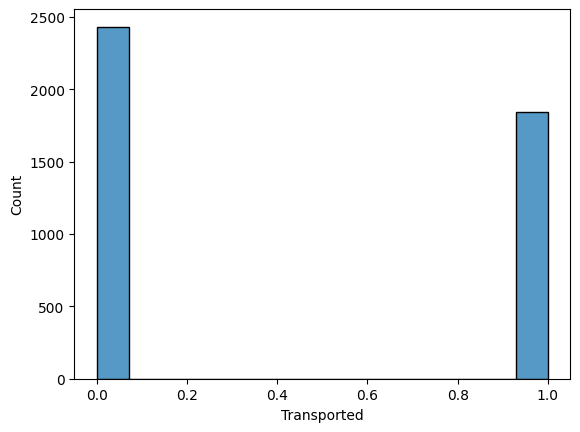

In [184]:
# DataFrame: new_submission: distribution
import seaborn as sns
sns.histplot(data=new_submission, x="Transported")